# Random Forest

- Total dataset size: 135 samples
- Training set: 101 samples
- Testing set: 35 samples

Features used:

- LTA precipitation (mmpa)
- LTA PET (mm)
- Aridity idx
- MDT
- Rainfall seasonality
- Soil group (cat)
- Landcover (cat.)
- slope
- percent clay
- percent sand
- percent silt

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# machine learning packages
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

set_config(display='diagram', transform_output="pandas")

In [2]:
file = pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/all_variables6a.csv')
# OMIT ZERO RECHARGE SAMPLES
# extract data only for one-hot encoding
data = file.drop(columns=['Lon', 'Lat', 'Borehole'])
data = data.drop('Rech_co_1', axis = 1)
data = data.drop('Rech_co_2', axis = 1)
data = data.drop('RechC_WTF3', axis = 1)
data = data.drop('RechC_MRC3', axis = 1)
data = data.drop('RechC_WTF3c', axis = 1)
data = data.drop('RechC_MRC3c', axis = 1)
data = data.drop('RechC_4', axis = 1)
#data.dropna(inplace=True)
data

,R_mm_year,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Slope_30m,Slope_100m,Slope_500m,Slope_5000m,Land_Use_type,Perc_clay,Perc_sand,Perc_silt,Soil_class
0,1022.53,1069.21100,1085.8702,0.984658,0.748040,91.0,2.928825,5.247280,5.547492,12.647192,243 - Land principally occupied by agriculture...,18.604446,49.043514,32.352036,CAMBISSOLOS
1,148.99,934.68770,1054.0730,0.886739,0.759074,69.0,1.425283,2.207789,4.168107,4.902558,212 - Permanently irrigated land,8.463341,71.482796,20.053864,PODZOIS
2,369.87,895.61194,1063.8200,0.841883,0.761298,93.0,1.655054,3.431121,4.697247,6.386671,312 - Coniferous forest,6.334242,74.322480,19.343277,CAMBISSOLOS
3,84.62,934.68770,1054.0730,0.886739,0.759074,85.0,1.502227,1.738666,4.875282,6.134731,212 - Permanently irrigated land,6.244911,83.027060,10.728027,PODZOIS
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1236.03,607.50230,1105.2213,0.549666,0.925135,119.0,1.518347,3.192977,6.810530,9.883235,223 - Olive groves,23.784560,37.215134,39.000305,LUVISSOLOS
137,404.16,571.71100,1130.1387,0.505877,0.930689,97.0,2.252468,2.276919,5.224702,8.765383,323 - Sclerophyllous vegetation,26.848026,34.701523,38.450450,CAMBISSOLOS
138,259.03,571.71100,1130.1387,0.505877,0.930689,99.0,1.385533,2.566365,5.118395,8.765383,323 - Sclerophyllous vegetation,26.848026,34.701523,38.450450,CAMBISSOLOS
139,0.00,571.71100,1130.1387,0.505877,0.930689,118.0,1.050154,4.483253,6.665124,9.324407,241 - Annual crops associated with permanent c...,27.979504,28.401398,43.619100,LUVISSOLOS


In [3]:
#encode categorical variables
labelencoder = LabelEncoder()
data['land_use_type_cat'] = labelencoder.fit_transform(data['Land_Use_type'])
data['soil_class_cat'] = labelencoder.fit_transform(data['Soil_class'])

# remove categorical variables
data = data.drop('Land_Use_type', axis = 1)
#data = data.drop('landcover_cat', axis = 1)
#data = data.drop('soil_classification', axis = 1)
data = data.drop('Soil_class', axis = 1)
#data = data.drop('percent_clay', axis = 1)
#data = data.drop('percent_sand', axis = 1)
#data = data.drop('percent_silt', axis = 1)
#data = data.drop('Rainfall_seasonality2', axis = 1)
#data = data.drop('slope_30m_percent', axis = 1)
#data = data.drop('Rainfall_Seasonality2', axis = 1)
data = data.drop(['Slope_5000m', 'Slope_500m', 'Slope_100m'], axis = 1)
data = data[data['R_mm_year'] > 0.5]
data.dropna(inplace=True)
data

,R_mm_year,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Slope_30m,Perc_clay,Perc_sand,Perc_silt,land_use_type_cat,soil_class_cat
0,1022.53,1069.21100,1085.8702,0.984658,0.748040,91.0,2.928825,18.604446,49.043514,32.352036,12,0
1,148.99,934.68770,1054.0730,0.886739,0.759074,69.0,1.425283,8.463341,71.482796,20.053864,5,4
2,369.87,895.61194,1063.8200,0.841883,0.761298,93.0,1.655054,6.334242,74.322480,19.343277,15,0
3,84.62,934.68770,1054.0730,0.886739,0.759074,85.0,1.502227,6.244911,83.027060,10.728027,5,4
6,54.37,1045.85880,1107.4349,0.944398,0.748662,264.0,5.504116,12.681211,50.982796,36.335990,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
135,1740.43,631.99600,1088.2620,0.580739,0.919057,163.0,3.216023,26.049686,35.114900,38.835415,8,3
136,1236.03,607.50230,1105.2213,0.549666,0.925135,119.0,1.518347,23.784560,37.215134,39.000305,8,3
137,404.16,571.71100,1130.1387,0.505877,0.930689,97.0,2.252468,26.848026,34.701523,38.450450,17,0
138,259.03,571.71100,1130.1387,0.505877,0.930689,99.0,1.385533,26.848026,34.701523,38.450450,17,0


In [4]:
# Labels are the values we want to predict
y = data['R_mm_year']
# Remove the labels from the features
X = data.drop('R_mm_year', axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42) # random_state is used to make sure that the split is always the same

# Inspect the Data

Visualization

In [6]:
from sklearn.ensemble import RandomForestRegressor
# instantiate models with no parameters first
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_train = rfr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)
print(mae)
print(mse)
print(rmse)
print(r2)

119.47800294117644
40123.68026520556
200.30896201919066
0.871949072674525


In [8]:
y_pred_test = rfr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)
print(mae)
print(mse)
print(rmse)
print(r2)

301.2372538461539
211632.25967610767
460.03506352897455
0.3232436044992205


## Find hyper parameter

In [19]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf)
    
    score = cross_val_score(model, X, y, n_jobs=-1, cv=5, scoring='neg_mean_squared_error').mean()
    return score

In [20]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42)) # Default is random Search

[I 2024-08-25 13:59:24,832] A new study created in memory with name: no-name-84e93d9e-ddf8-410e-920f-6f51b631232c


In [21]:
study.optimize(objective, n_trials=100)

[I 2024-08-25 13:59:27,555] Trial 0 finished with value: -0.34426812136382723 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 13}. Best is trial 0 with value: -0.34426812136382723.
[I 2024-08-25 13:59:28,369] Trial 1 finished with value: -0.3612298798540462 and parameters: {'n_estimators': 240, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 18}. Best is trial 0 with value: -0.34426812136382723.
[I 2024-08-25 13:59:30,474] Trial 2 finished with value: -0.37331202779899414 and parameters: {'n_estimators': 641, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 20}. Best is trial 0 with value: -0.34426812136382723.
[I 2024-08-25 13:59:33,419] Trial 3 finished with value: -0.3522659526405907 and parameters: {'n_estimators': 850, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.34426812136382723.
[I 2024-08-25 13:59:34,705] Trial 4 finished with value: -0.34504411741456

In [26]:
best_params = study.best_params
best_score = study.best_value

In [27]:
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.3f}")

Best Hyperparameters: {'n_estimators': 356, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 11}
Best Accuracy: -0.336


In [28]:
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

best_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=11, min_samples_split=13,
                      n_estimators=356)

In [29]:
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

0.4625309707808206
0.3336178778095943
0.5775966393683348
0.2541579558137893


In [80]:
from sklearn.model_selection import RandomizedSearchCV

estimator = RandomForestRegressor()
# Number of trees in random forest
n_estimators = [1000, 2000, 2500]
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 0.33]
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, None]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=estimator, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_root_mean_squared_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['sqrt', 'log2', 0.33],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1000, 2000, 2500]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [81]:
rf_random.best_score_

-0.19036024648899622

In [82]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [23]:
best_params = rf_random.best_params_
print(f"Best parameters found: {best_params}")

Best parameters found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 0.33, 'max_depth': None}


# Experiment 1: 100 runs for reliable importance measure

In [16]:
# collect all importances, R2 and oob values to calculate the average over 100 models
importances = []
train_r2=[]
test_r2=[]
oobs=[]
train_r2_untransf=[]
test_r2_untransf=[]
# find the best model based on the lowest RMSE
best_model = None
best_r2 = -float('inf')
best_importances = None
best_train_features, best_test_features, best_train_labels, best_test_labels = None, None, None, None
best_rmse = float('inf')
# find the worst model based on the highest RMSE
worst_model = None
worst_r2 = float('inf')
worst_train_features, worst_test_features, worst_train_labels, worst_test_labels = None, None, None, None
worst_rmse = 0

# run model 100 times
for i in range(0,100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test_ = train_test_split(X, y, test_size = 0.2)    
    # Instantiate models with 2000 decision trees
    rf = RandomForestRegressor(n_estimators = 2000, max_features='sqrt' , oob_score=True, min_samples_split= 15, min_samples_leaf= 7, max_depth=20) 
    
    # Train the model on training data
    rf.fit(X_train, y_train)

    # Use the forest's predict method on the test data
    predictions = rf.predict(X_test)
    train_predictions = rf.predict(X_train)
    current_r2 = metrics.r2_score(y_test, predictions)
    current_train_r2 = metrics.r2_score(y_train, train_predictions)
    
    train_r2.append(current_train_r2)
    test_r2.append(current_r2)
    train_r2_untransf.append(metrics.r2_score(y_train, train_predictions))
    test_r2_untransf.append(metrics.r2_score(y_test, predictions))
    oobs.append(rf.oob_score_)
    print(f'Out-of-bag score estimate: {rf.oob_score_:>9}; Train R-2: {current_train_r2:>9}, Test R-2: {current_r2:>9}')

    current_rmse = root_mean_squared_error(y_test, predictions)
    print(f"current rmse {current_rmse}")
    if current_r2>best_r2:
        best_rmse = current_rmse
        best_r2 = current_r2
        best_model = rf
        best_importances = rf.feature_importances_
        best_X_train, best_X_test, best_y_train, best_y_test = X_train, X_test, y_train, y_test
    
    if current_r2<worst_r2:
        worst_r2 = current_r2
        worst_rmse = current_rmse
        worst_model = rf
        worst_X_train, worst_X_test, worst_y_train, worst_y_test = X_train, X_test, y_train, y_test
    importances.append(rf.feature_importances_)

Out-of-bag score estimate: 0.10159907442391536; Train R-2: 0.3492873488973687, Test R-2: -0.22475578255000217
current rmse 618.8700982429605
Out-of-bag score estimate: -0.011560355283754653; Train R-2: 0.2853197386661227, Test R-2: -0.27368724655224685
current rmse 631.1115820437623
Out-of-bag score estimate: 0.13162426957598983; Train R-2: 0.3801513688578544, Test R-2: 0.10708523236462841
current rmse 528.4206160774925
Out-of-bag score estimate: 0.02875913642056871; Train R-2: 0.31247217039226505, Test R-2: -0.21821934929022446
current rmse 617.2164564144498
Out-of-bag score estimate: 0.16518830810567597; Train R-2: 0.3967043382033588, Test R-2: -0.12184227752900734
current rmse 592.2985256310949
Out-of-bag score estimate: 0.10111214180519545; Train R-2: 0.3602933637031426, Test R-2: -0.11743908119095048
current rmse 591.1350060916857
Out-of-bag score estimate: 0.12396231532440427; Train R-2: 0.3535588347239892, Test R-2: -0.17570974618254498
current rmse 606.3519930260123
Out-of-bag 

In [84]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

best_predictions = best_model.predict(best_test_features)
# Use the forest's predict method on the training data
best_train_predictions = best_model.predict(best_train_features)

print("+++ METRICS ON LOG-TRANSFORMED VALUES +++")
print(f"Max R2 train: {np.array(train_r2).max()}")
print(f"Min R2 train: {np.array(train_r2).min()}")
print(f"Mean R2 train: {np.array(train_r2).mean()}")
print(f'Best RMSE train: {root_mean_squared_error(best_train_labels, best_train_predictions)}')
print(f'Best MAE train: {mean_absolute_error(best_train_labels, best_train_predictions)}\n')

print(f"Max oob: {np.array(oobs).max()}")
print(f"Min oob: {np.array(oobs).min()}")
print(f"Mean oob: {np.array(oobs).mean()}\n")

print(f"Max R2 test: {np.array(test_r2).max()}")
print(f"Min R2 test: {np.array(test_r2).min()}")
print(f"Mean R2 test: {np.array(test_r2).mean()}")
print(f'Best RMSE test: {root_mean_squared_error(best_test_labels, best_predictions)}')
print(f'Best MAE test: {mean_absolute_error(best_test_labels, best_predictions)}\n')

print("+++ METRICS ON BACK TRANSFORMED VALUES +++")
print(f"Max R2 train: {np.array(train_r2_untransf).max()}")
print(f"Min R2 train: {np.array(train_r2_untransf).min()}")
print(f"Mean R2 train: {np.array(train_r2_untransf).mean()}\n")
print(f"Max R2 test: {np.array(test_r2_untransf).max()}")
print(f"Min R2 test: {np.array(test_r2_untransf).min()}")
print(f"Mean R2 test: {np.array(test_r2_untransf).mean()}")

C:\Users\35191\.conda\envs\aiml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [85]:
print("+++ Best model metrics +++\n")
print("--- log transformed ---")
print(f'Out-of-bag R-2 score estimate: {best_model.oob_score_:>5.3}')
print('Best R2 train: ', best_model.score(best_train_features, best_train_labels))
print(f'Best R2 test:  {best_model.score(best_test_features, best_test_labels)}\n')
print("--- back transformed ---")
print(f'Best RMSE train: {root_mean_squared_error(best_train_labels, best_train_predictions)}')
print(f"Best RMSE test: {best_rmse}")
print(f"Best R2 train: {metrics.r2_score(best_train_labels, best_train_predictions)}")
print(f"Best R2 test: {metrics.r2_score(best_test_labels, best_predictions)}")
print(f"Best MAE train: {mean_absolute_error(best_train_labels, best_train_predictions)}")
print(f"Best MAE test: {mean_absolute_error(best_test_labels, best_predictions)}")

+++ Best model metrics +++

--- log transformed ---
Out-of-bag R-2 score estimate: -0.000719


C:\Users\35191\.conda\envs\aiml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [10]:
worst_predictions = worst_model.predict(worst_test_features)
# Use the forest's predict method on the training data
worst_train_predictions = worst_model.predict(worst_train_features)

print("+++ Worst model metrics +++\n")
print("--- log transformed ---")
print(f'Out-of-bag R-2 score estimate: {worst_model.oob_score_:>5.3}')
print('worst R2 train: ', worst_model.score(best_train_features, worst_train_labels))
print(f'worst R2 test:  {worst_model.score(best_test_features, worst_test_labels)}\n')
print("--- back transformed ---")
print(f'worst RMSE train: {root_mean_squared_error(worst_train_labels, worst_train_predictions)}')
print(f"worst RMSE test: {worst_rmse}")
print(f"worst R2 train: {metrics.r2_score(worst_train_labels, worst_train_predictions)}")
print(f"worst R2 test: {metrics.r2_score(worst_test_labels, worst_predictions)}")

+++ Worst model metrics +++

--- log transformed ---
Out-of-bag R-2 score estimate: 0.331
worst R2 train:  -0.6725479924802633
worst R2 test:  -0.834333068380184

--- back transformed ---
worst RMSE train: 0.15396144744787665
worst RMSE test: 0.29621788949758393
worst R2 train: 0.7394611693110873
worst R2 test: -0.5563617722572776


In [11]:
feature_list = list(data.columns)
importances = np.array(importances)
mean_importances = np.mean(importances, axis=0)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, mean_importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('Mean feature importance')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Mean feature importance
Variable: ETP_mm_year          Importance: 0.23
Variable: aridity_index        Importance: 0.2
Variable: precip_mm_year       Importance: 0.19
Variable: elevation            Importance: 0.15
Variable: soil_moisture_m3_m3  Importance: 0.12
Variable: land_use_type_cat    Importance: 0.08
Variable: soil_class_cat       Importance: 0.03


In [12]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, best_importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
print('Best performing model: feature importance')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Best performing model: feature importance
Variable: ETP_mm_year          Importance: 0.23
Variable: precip_mm_year       Importance: 0.2
Variable: aridity_index        Importance: 0.18
Variable: elevation            Importance: 0.16
Variable: soil_moisture_m3_m3  Importance: 0.12
Variable: land_use_type_cat    Importance: 0.08
Variable: soil_class_cat       Importance: 0.03


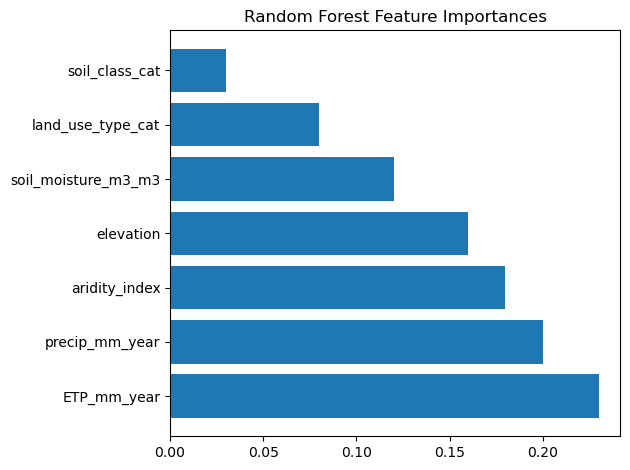

In [13]:
feature_names = [f[0] for f in feature_importances]
y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, [f[1] for f in feature_importances])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/feature_plots.png', format='png', dpi=2000)
plt.show()

## Permutation importance

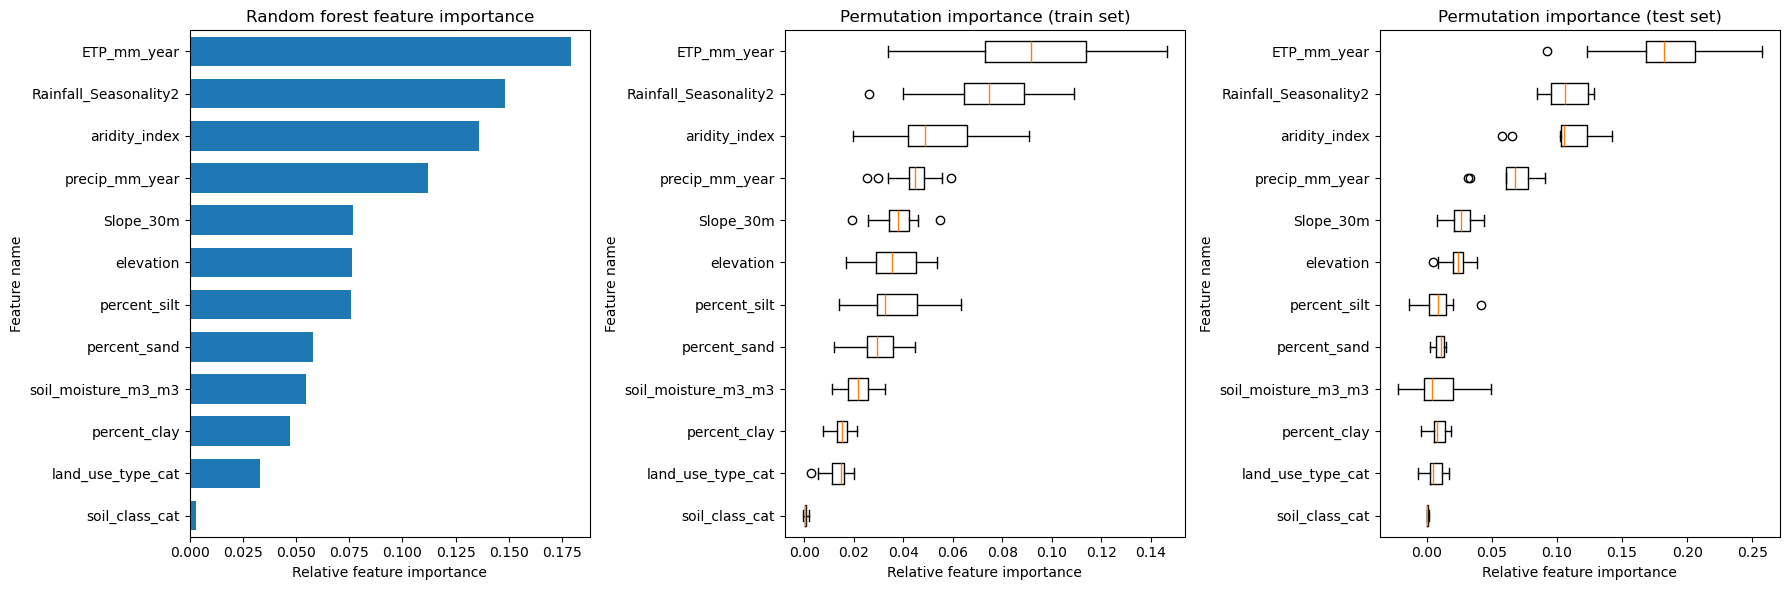

In [15]:
from sklearn.inspection import permutation_importance
feature_names = data.columns

# permutation importance on training set
result_train = permutation_importance(best_model, best_train_features, best_train_labels, n_repeats=30,
                                random_state=42)
perm_sorted_idx = result_train.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(best_model.feature_importances_)
tree_indices = np.arange(0, len(best_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.barh(tree_indices,
         best_model.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_title('Random forest feature importance')
ax1.set_ylabel('Feature name')
ax1.set_xlabel('Relative feature importance')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(feature_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(best_model.feature_importances_)))
ax2.boxplot(result_train.importances[perm_sorted_idx].T, vert=False,
            labels=feature_names[tree_importance_sorted_idx])
ax2.set_title('Permutation importance (train set)')
ax2.set_ylabel('Feature name')
ax2.set_xlabel('Relative feature importance')

# permutation importance on test set
result_test = permutation_importance(best_model, best_test_features, best_test_labels, n_repeats=10,
                                random_state=42)

perm_sorted_idx = result_test.importances_mean.argsort()
ax3.boxplot(result_test.importances[perm_sorted_idx].T, vert=False,
            labels=feature_names[tree_importance_sorted_idx])
ax3.set_title('Permutation importance (test set)')
ax3.set_ylabel('Feature name')
ax3.set_xlabel('Relative feature importance')

#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/feature_plots_box.png', format='png', dpi=2000)
fig.tight_layout()
plt.show()

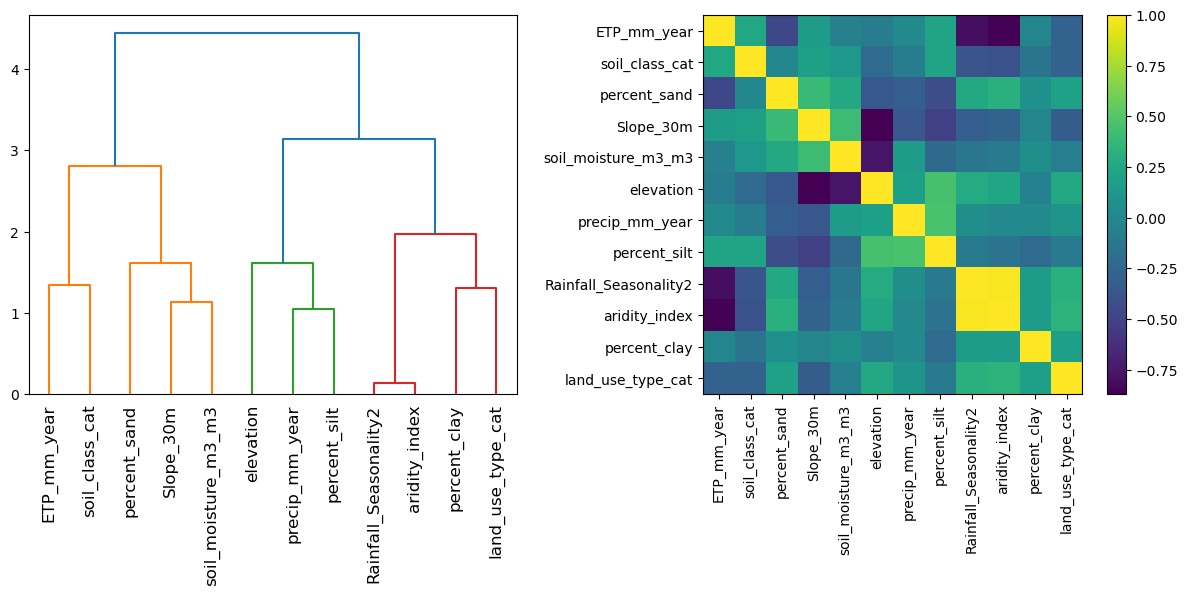

In [18]:
# handle multicollinearity
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
corr = spearmanr(features).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=feature_names, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

im = ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
fig.colorbar(im)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

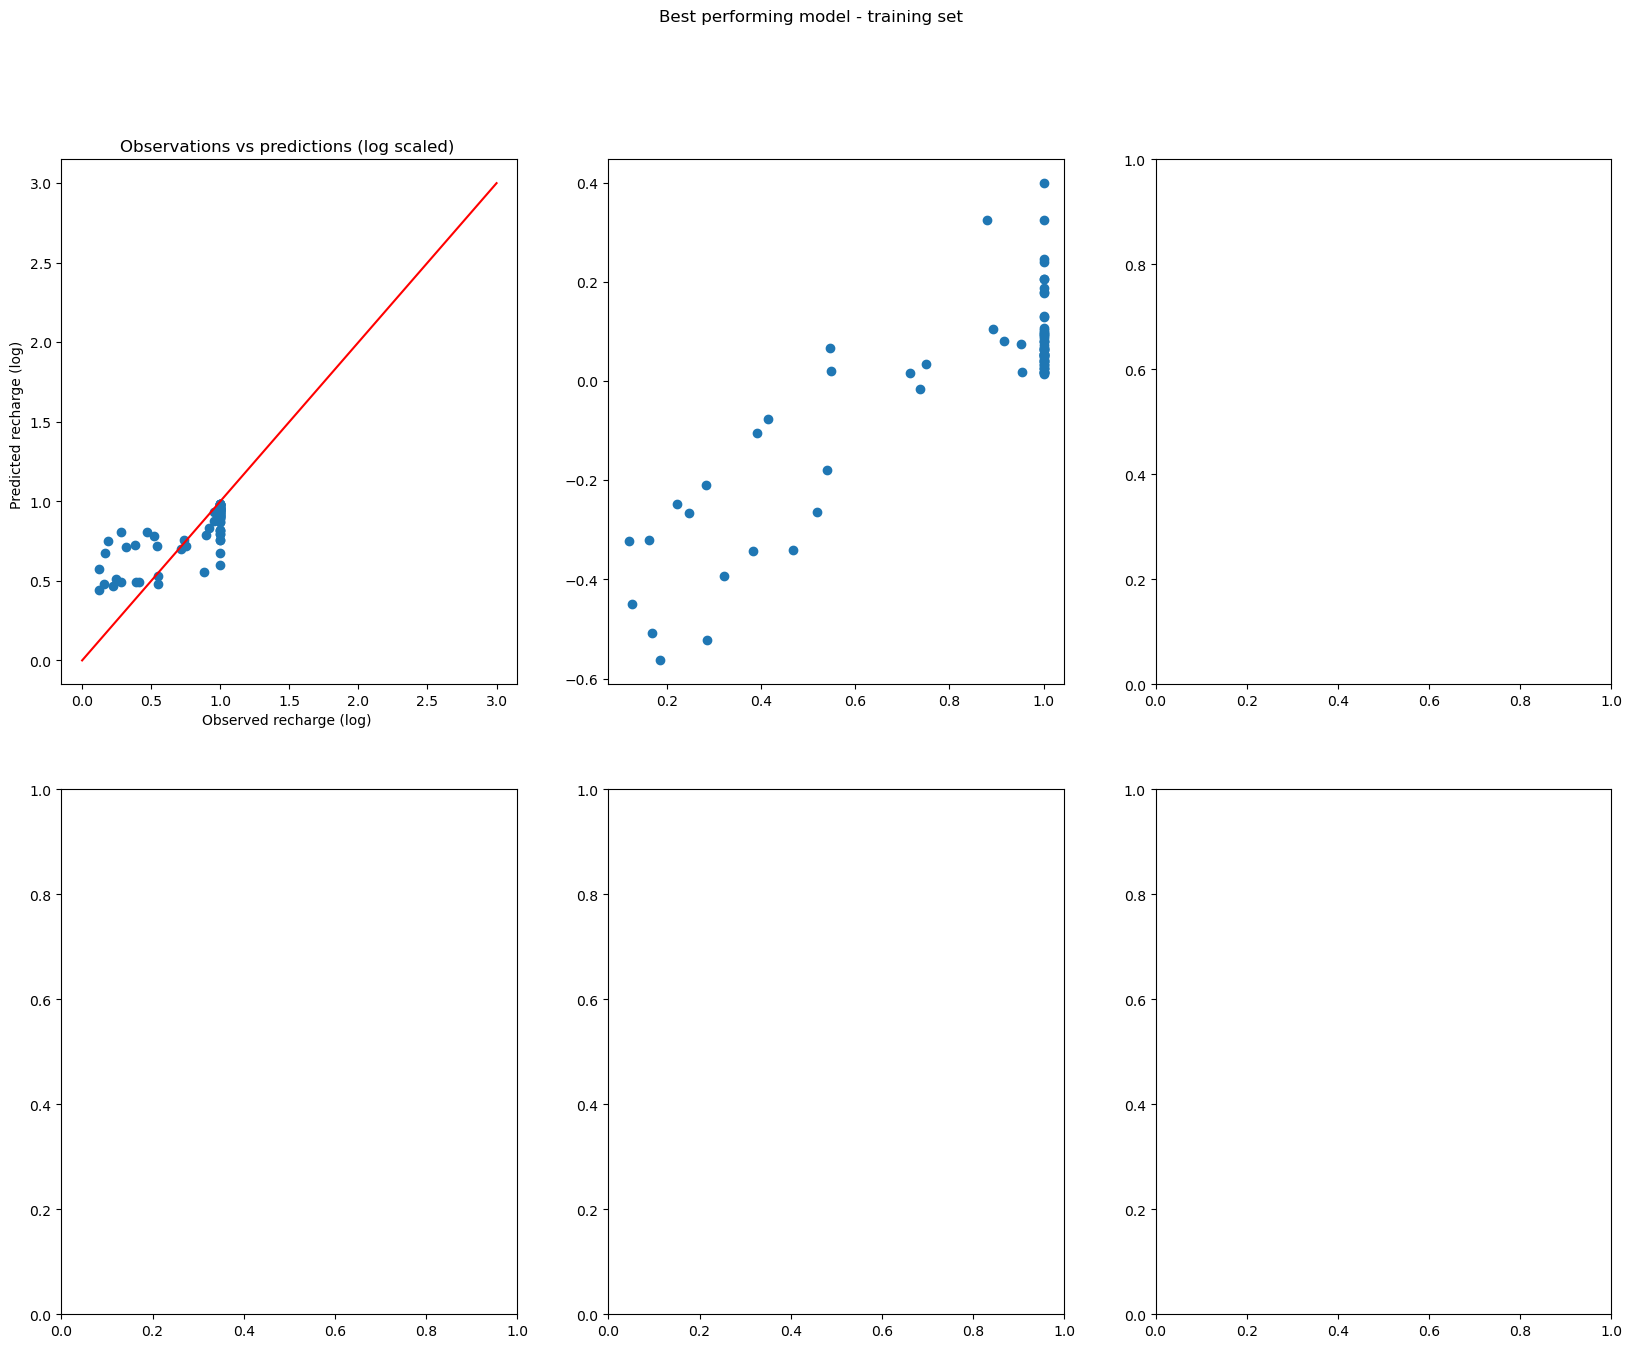

In [22]:
fig, axs = plt.subplots(2,3,figsize=(20,15))
fig.suptitle('Best performing model - training set')
axs = axs.flatten()

axs[0].scatter(best_train_labels, best_train_predictions)
axs[0].plot(range(-1,4), range(-1,4), 'r')
#axs[0].plot(range(0,700), range(0,700), 'r')
axs[0].set_title('Observations vs predictions (log scaled) ')
axs[0].set_xlabel('Observed recharge (log) ')
axs[0].set_ylabel('Predicted recharge (log) ')
#axs[0].set_xlim([0,700])
#axs[0].set_ylim([0,700])

axs[1].plot(best_train_labels, best_train_labels - best_train_predictions,marker='o',linestyle='')
axs[1].plot(range(-1,4), np.zeros((5,)), '--')
#axs[1].plot(range(0,450), np.zeros((450,)), '--')
axs[1].set_title('Residuals (log scaled) ')
axs[1].set_xlabel('Observed recharge (log)')
axs[1].set_ylabel('Residual (log) ')
#axs[1].set_xlim([0,450])
#axs[1].set_ylim([-450,450])

axs[2].plot(best_train_predictions, best_train_labels - best_train_predictions,marker='o',linestyle='')
axs[2].plot(range(-1,4), np.zeros((5,)), '--')
#axs[2].plot(range(0,450), np.zeros((450,)), '--')
axs[2].set_title('Residuals (log scaled) ')
axs[2].set_xlabel('Modelled recharge (log)')
axs[2].set_ylabel('Residual (log) ')
#axs[2].set_xlim([0,450])
#axs[2].set_ylim([-450,450])

axs[3].scatter(10**best_train_labels, 10**best_train_predictions)
#axs[3].plot(range(-1,4), range(-1,4), 'r')
axs[3].plot(range(0,1000), range(0,1000), 'r')
axs[3].set_title('Observations vs predictions ')
axs[3].set_xlabel('Observed recharge (mmpa) ')
axs[3].set_ylabel('Predicted recharge (mmpa) ')
axs[3].set_xlim([0,1000])
axs[3].set_ylim([0,1000])

axs[4].plot(10**best_train_labels, 10**best_train_labels - 10**best_train_predictions,marker='o',linestyle='')
axs[4].plot(range(0,1000), np.zeros((1000,)), '--')
axs[4].set_title('Residuals ')
axs[4].set_xlabel('Observed recharge (mmpa)')
axs[4].set_ylabel('Residual (mmpa) ')
axs[4].set_xlim([0,600])
axs[4].set_ylim([-400,400])

axs[5].plot(10**best_train_predictions, 10**best_train_labels - 10**best_train_predictions,marker='o',linestyle='')
axs[5].plot(range(0,1000), np.zeros((1000,)), '--')
axs[5].set_title('Residuals ')
axs[5].set_xlabel('Modelled recharge (mmpa)')
axs[5].set_ylabel('Residual (mmpa) ')
axs[5].set_xlim([0,600])
axs[5].set_ylim([-400,400])

# n_bins = 10
# axs[2].hist(train_labels, bins=n_bins)
# axs[2].set_title('Distribution of observed recharge in the training set (scaled) ')
# axs[2].set_xlabel('Observed recharge (log10) ')
# axs[2].set_ylabel('Number of observations')
# axs[2].set_xlim([-1,3])
# #axs[2].set_ylim([0,25])

#fig.savefig('Graphics/res_training_best.jpg')

In [20]:
# testing set metrics
print('=== Prediction of testing set - best performing model ===')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(best_test_labels, best_predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(best_test_labels, best_predictions))
print('Root Mean Squared Error (RMSE):', root_mean_squared_error(best_test_labels, best_predictions))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(best_test_labels, best_predictions))
print('Explained Variance Score:', metrics.explained_variance_score(best_test_labels, best_predictions))
print('Max Error:', metrics.max_error(best_test_labels, best_predictions))
print('Median Absolute Error:', metrics.median_absolute_error(best_test_labels, best_predictions))
print('R^2:', metrics.r2_score(best_test_labels, best_predictions))

=== Prediction of testing set - best performing model ===
Mean Absolute Error (MAE): 0.1407830579223924
Mean Squared Error (MSE): 0.02893494104466531
Root Mean Squared Error (RMSE): 0.1701027367347901
Mean Absolute Percentage Error (MAPE): 0.2536783186569541
Explained Variance Score: 0.6024302424412904
Max Error: 0.3264749815858765
Median Absolute Error: 0.1041003901382998
R^2: 0.5866982918149013


(-400.0, 400.0)

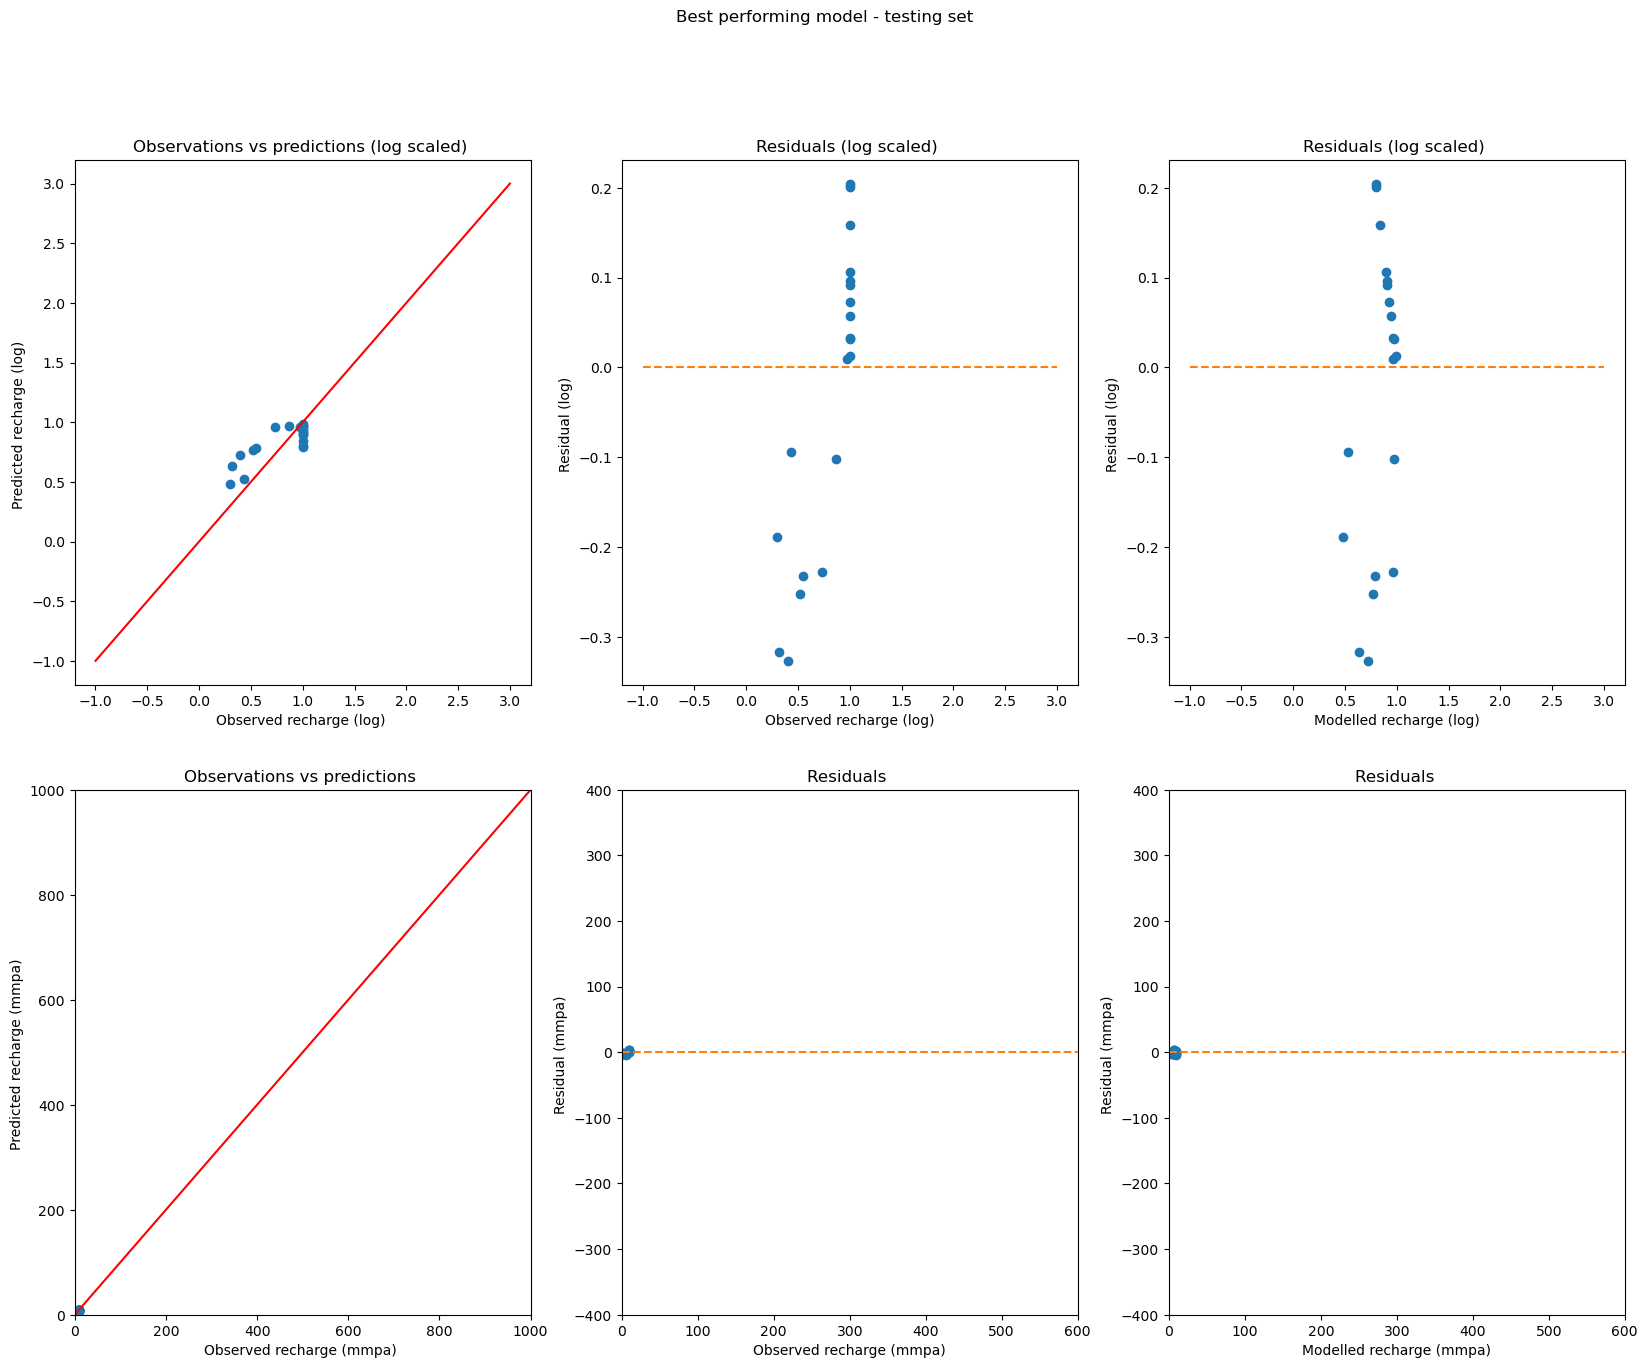

In [21]:
fig, axs = plt.subplots(2,3,figsize=(20,15))
fig.suptitle('Best performing model - testing set')
axs = axs.flatten()

axs[0].scatter(best_test_labels, best_predictions)
axs[
    0].plot(range(-1,4), range(-1,4), 'r')
#axs[0].plot(range(0,700), range(0,700), 'r')
axs[0].set_title('Observations vs predictions (log scaled) ')
axs[0].set_xlabel('Observed recharge (log) ')
axs[0].set_ylabel('Predicted recharge (log) ')
#axs[0].set_xlim([0,700])
#axs[0].set_ylim([0,700])

axs[1].plot(best_test_labels, best_test_labels - best_predictions,marker='o',linestyle='')
axs[1].plot(range(-1,4), np.zeros((5,)), '--')
#axs[1].plot(range(0,450), np.zeros((450,)), '--')
axs[1].set_title('Residuals (log scaled) ')
axs[1].set_xlabel('Observed recharge (log)')
axs[1].set_ylabel('Residual (log) ')
#axs[1].set_xlim([0,450])
#axs[1].set_ylim([-450,450])

axs[2].plot(best_predictions, best_test_labels - best_predictions,marker='o',linestyle='')
axs[2].plot(range(-1,4), np.zeros((5,)), '--')
#axs[2].plot(range(0,450), np.zeros((450,)), '--')
axs[2].set_title('Residuals (log scaled) ')
axs[2].set_xlabel('Modelled recharge (log)')
axs[2].set_ylabel('Residual (log) ')
#axs[2].set_xlim([0,450])
#axs[2].set_ylim([-450,450])

axs[3].scatter(10**best_test_labels, 10**best_predictions)
#axs[3].plot(range(-1,4), range(-1,4), 'r')
axs[3].plot(range(0,1000), range(0,1000), 'r')
axs[3].set_title('Observations vs predictions ')
axs[3].set_xlabel('Observed recharge (mmpa) ')
axs[3].set_ylabel('Predicted recharge (mmpa) ')
axs[3].set_xlim([0,1000])
axs[3].set_ylim([0,1000])

axs[4].plot(10**best_test_labels, 10**best_test_labels - 10**best_predictions,marker='o',linestyle='')
axs[4].plot(range(0,1000), np.zeros((1000,)), '--')
axs[4].set_title('Residuals ')
axs[4].set_xlabel('Observed recharge (mmpa)')
axs[4].set_ylabel('Residual (mmpa) ')
axs[4].set_xlim([0,600])
axs[4].set_ylim([-400,400])

axs[5].plot(10**best_predictions, 10**best_test_labels - 10**best_predictions,marker='o',linestyle='')
axs[5].plot(range(0,1000), np.zeros((1000,)), '--')
axs[5].set_title('Residuals ')
axs[5].set_xlabel('Modelled recharge (mmpa)')
axs[5].set_ylabel('Residual (mmpa) ')
axs[5].set_xlim([0,600])
axs[5].set_ylim([-400,400])

# n_bins = 10
# axs[2].hist(test_labels, bins=n_bins)
# axs[2].set_title('Distribution of observed recharge in the testing set (scaled) ')
# axs[2].set_xlabel('Observed recharge (log10) ')
# axs[2].set_ylabel('Number of observations')
# axs[2].set_xlim([-1,3])

#fig.savefig('Graphics/res_testing_best.jpg')

In [1]:
import pandas as pd

df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/all_variables2.csv')
db=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/bh_for_filt.csv')
df

,borehole_name,lon,lat,R_mm_year,precip_mm_year,ETP_mm_year,aridity_index,rainfall_seasonality,elevation,terrain_slope,landcover_cat,land_use_type,percent_clay,percent_sand,percent_silt,soil_classification,soil_classification_code
0,34/32,-7.446921,41.746801,178.83,870.64220,1089.9006,0.798827,0.060306,349.0,89.909966,13,212 - Permanently irrigated land,10.232822,54.222443,35.544740,FLUVISSOLOS,104
1,512/32,-7.438376,38.098406,86.42,499.82016,1301.8915,0.383918,0.064150,235.0,89.988840,17,223 - Olive groves,18.929375,45.764140,35.306488,LUVISSOLOS,804
2,524/116,-7.286827,38.036648,9.75,569.83300,1289.9307,0.441755,0.064540,207.0,89.993286,22,244 - Agro-forestry areas,19.767477,46.971252,33.261270,LUVISSOLOS,807
3,512/215,-7.413606,38.052798,0.00,515.59110,1303.9972,0.395393,0.063832,218.0,89.971530,17,223 - Olive groves,20.338990,45.096740,34.564270,LUVISSOLOS,804
4,501/63,-7.450862,38.143568,42.80,499.82016,1301.8915,0.383918,0.064150,189.0,89.988840,1,111 - Continuous urban fabric,26.853899,37.805702,35.340400,LUVISSOLOS,804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,263/12,-8.395251,40.011921,20.42,1066.19510,1111.6426,0.959117,0.063095,267.0,89.995820,25,313 - Mixed forest,13.869223,61.871440,24.259338,CAMBISSOLOS,716
131,299/74,-8.374969,39.680614,99.07,946.53955,1219.5374,0.776146,0.065290,192.0,89.997790,19,241 - Annual crops associated with permanent c...,20.674896,48.108430,31.216675,CAMBISSOLOS,717
132,299/79,-8.387260,39.726521,0.00,946.53955,1219.5374,0.776146,0.065290,203.0,89.988840,17,223 - Olive groves,22.878736,40.349030,36.772232,CAMBISSOLOS,717
133,310/158,-8.392466,39.622033,412.09,865.89150,1264.6675,0.684679,0.065707,117.0,89.994385,29,324 - Transitional woodland-shrub,23.431578,39.882050,36.686370,LITOSSOLOS,303


In [2]:
db

,borehole,WTF_Exponential4,WTF_MRC_exponential
0,34/32,0.22,0.21
1,228/52,0.77,0.35
2,229/278,0.21,0.46
3,229/285,0.32,0.31
4,250/37,0.70,0.18
...,...,...,...
95,524/5,0.17,0.03
96,524/51,0.15,0.10
97,524/82,0.12,0.04
98,532/153,0.40,0.23


In [5]:
import pandas as pd

# Assuming df and db are your DataFrames
# Strip whitespace and ensure consistency in case for both DataFrames
df['borehole_name'] = df['borehole_name'].str.strip().str.upper()
db['borehole'] = db['borehole'].str.strip().str.upper()

# Ensure columns are of the same type (string)
df['borehole_name'] = df['borehole_name'].astype(str)
db['borehole'] = db['borehole'].astype(str)

# Find borehole names in db that are not in df
missing_boreholes = db[~db['borehole'].isin(df['borehole_name'])]

# Print missing boreholes
print("Borehole names in db not found in df:")
print(missing_boreholes['borehole'].tolist())

# Optionally print the number of missing boreholes
print(f"Number of boreholes in db not found in df: {missing_boreholes.shape[0]}")


Borehole names in db not found in df:
['250/37', '251/18', '299/6', '413/78', '414/7', '512/5', '519/3', '597/642', '597/8', '524/4', '524/5']
Number of boreholes in db not found in df: 11


In [6]:
# Filter df to keep only the rows where borehole names exist in db
df_filtered = df[df['borehole_name'].isin(db['borehole'])]

# Display the filtered dataframe
print(df_filtered)


    borehole_name       lon        lat  R_mm_year  precip_mm_year  \
0           34/32 -7.446921  41.746801     178.83       870.64220   
1          512/32 -7.438376  38.098406      86.42       499.82016   
2         524/116 -7.286827  38.036648       9.75       569.83300   
4          501/63 -7.450862  38.143568      42.80       499.82016   
5          513/34 -7.378075  38.082296      62.77       515.59110   
..            ...       ...        ...        ...             ...   
128       229/278 -8.666582  40.243392     369.87       895.61194   
129        251/19 -8.391954  40.069197      54.37      1045.85880   
130        263/12 -8.395251  40.011921      20.42      1066.19510   
131        299/74 -8.374969  39.680614      99.07       946.53955   
133       310/158 -8.392466  39.622033     412.09       865.89150   

     ETP_mm_year  aridity_index  rainfall_seasonality  elevation  \
0      1089.9006       0.798827              0.060306      349.0   
1      1301.8915       0.383918    

In [8]:
df_filtered.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/all_variables3.csv')